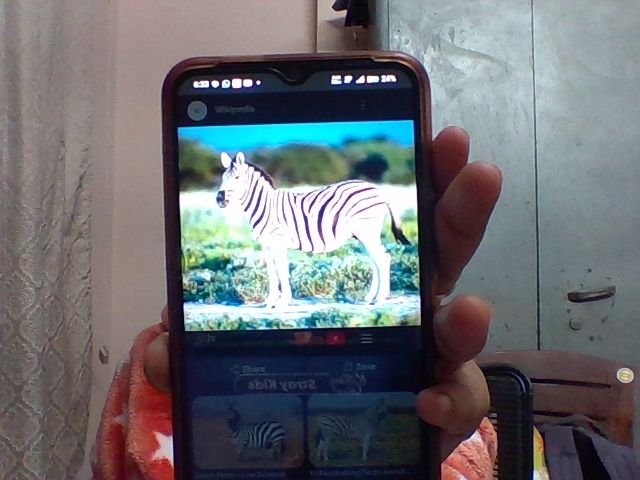

In [11]:
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import base64

def take_photo():
    js_code = """
        async function takePhotoInternal() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Create button
            const button = document.createElement('button');
            button.innerHTML = 'Capture Photo';
            button.style.fontSize = '20px';
            button.style.marginTop = '10px';
            document.body.appendChild(button);

            // Wait for user click
            await new Promise(resolve => button.onclick = resolve);

            // Capture to canvas
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();
            button.remove();

            return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhotoInternal();
    """

    data = eval_js(js_code)
    img_bytes = base64.b64decode(data.split(',')[1])
    img_array = np.frombuffer(img_bytes, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img

# Capture image
img = take_photo()
cv2_imshow(img)


In [12]:
from skimage.feature import hog

IMG_SIZE = (128, 128)
hog_params = {
    "orientations": 9,
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys"
}

def classify_image(input_image_array, model):
    # Convert to grayscale if it's color
    if len(input_image_array.shape) == 3:
        img_gray = cv2.cvtColor(input_image_array, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = input_image_array

    img_resized = cv2.resize(img_gray, IMG_SIZE)
    fd = hog(img_resized, **hog_params)
    fd = fd.reshape(1, -1)
    pred = model.predict(fd)[0]
    return pred

# Example usage
prediction = classify_image(img, clf)
print("Prediction:", prediction)


Prediction: zebras
